###Preparing Libraries and dataset

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df = pd.read_csv('data.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [42]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

Splitting dataset

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()
X_train[:, 1:] = sc.fit_transform(X_train[:, 1:])
X_test[:, 1:] = sc.transform(X_test[:, 1:])

###Model creation

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest_model = rf_classifier.fit(X_train, y_train)

In [59]:
y_pred = random_forest_model.predict(X_test)

###Evaluation

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [61]:
cm = confusion_matrix(y_test, y_pred)
print(f'Random forest confusion matrix:\n{cm}')


Random forest confusion matrix:
[[18  0  0]
 [ 0  8  0]
 [ 0  0 27]]


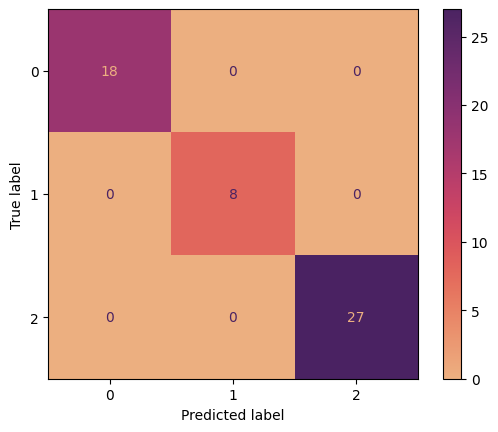

In [78]:
ConfusionMatrixDisplay(cm).plot(cmap='flare')
plt.show()

In [79]:
cr = classification_report(y_test, y_pred)
print(f'Random Forest Classification Report:\n{cr}')

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        27

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [63]:
print(f'Random forest accuracy score:\n{accuracy_score(y_test, y_pred)}')

Random forest accuracy score:
1.0


In [64]:
rf_classifier.feature_importances_

array([0.23411762, 0.50643582, 0.25944656])

###Optimization using important features

In [66]:
imp_features = ['AGE','HbA1c', 'BMI']
X = df[imp_features].values
y = df['Class'].values

###Exporting model

In [67]:
import joblib
joblib.dump(rf_classifier, 'model.pkl')

['model.pkl']

#Checking model

In [69]:
import seaborn as sns
print(df.corr()["Class"].sort_values(ascending=False))

Class     1.000000
HbA1c     0.771993
BMI       0.752083
AGE       0.514331
TG        0.313029
Chol      0.262123
Urea      0.232363
Cr        0.209028
Gender    0.196158
VLDL      0.156690
HDL      -0.029850
LDL      -0.047529
Name: Class, dtype: float64


In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)
print("Cross-val scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-val scores: [0.88679245 1.         1.         0.98113208 0.98076923]
Mean Accuracy: 0.9697387518142235
